In [7]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [8]:
conf = Configuration('confmuscleTwitch.rmto')

In [9]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)



pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
#pools[1] = AfferentPool(conf,'Ia', 'SOL')
#pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
All the 0 synapses were built
All the 0 synaptic noises were built


<IPython.core.display.Javascript object>


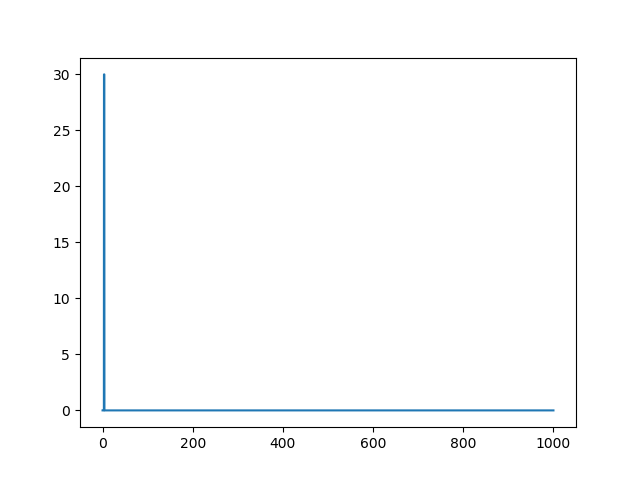

In [10]:
plt.figure()
plt.plot(t, pools[0].unit[0].nerveStimulus_mA)

In [11]:
tic = time.time()
for i in xrange(0, len(t)-1):
    pools[0].atualizeMotorUnitPool(t[i])
    #pools[1].atualizeAfferentPool(t[i])
    #pools[2].atualizeAfferentPool(t[i])
toc = time.time()
print str(toc - tic) + ' seconds'

1112.55451584 seconds


<IPython.core.display.Javascript object>


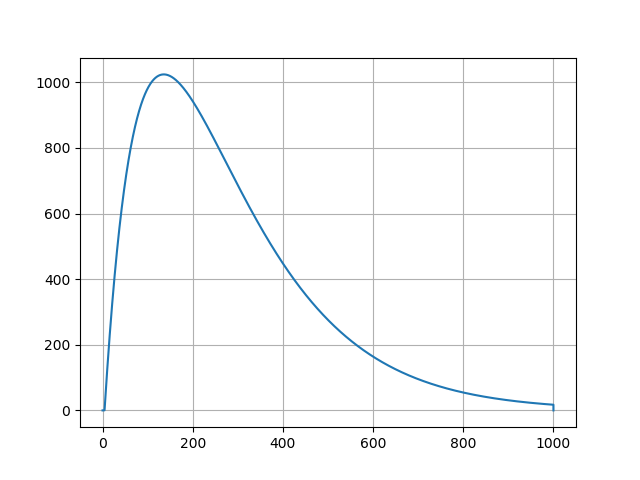

In [12]:
plt.figure()
plt.plot(t, pools[0].Muscle.force)
plt.grid()

<IPython.core.display.Javascript object>


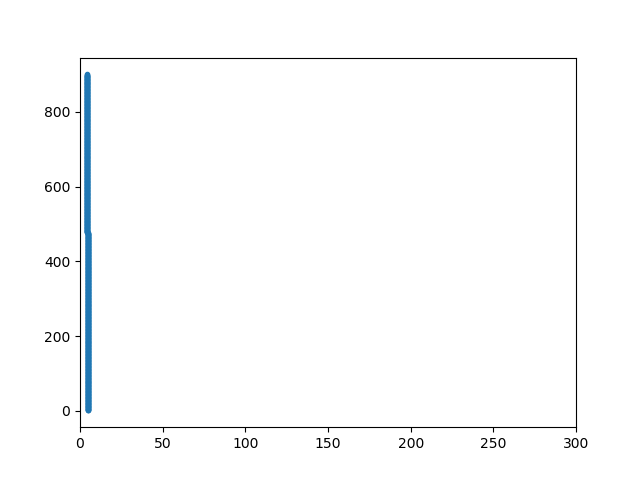

(0, 300)

In [13]:
pools[0].listSpikes()
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1]+1, '.')
plt.xlim([0,300])

<IPython.core.display.Javascript object>


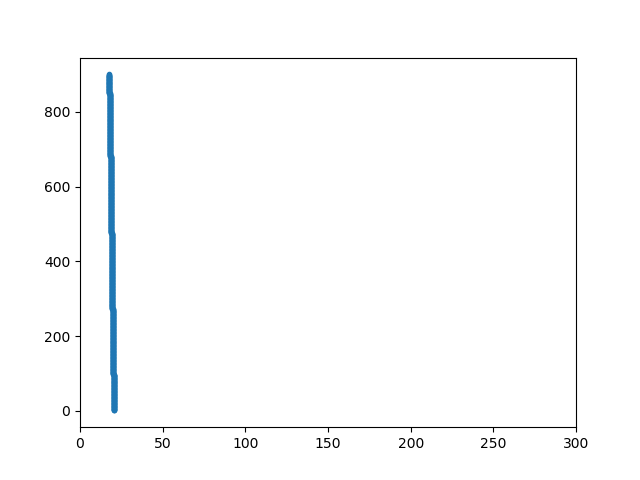

In [14]:
pools[0].listSpikes()
plt.figure()
plt.plot(pools[0].poolSomaSpikes[:, 0],
         pools[0].poolSomaSpikes[:, 1]+1, '.')
plt.xlim([0,300])
plt.show()